<a href="https://colab.research.google.com/github/sbarreto10/data-science-2022/blob/main/PRACTICA/SALES_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [10]:
from datetime import datetime

def hour_to_int(hourStr):
    hourObj = datetime.strptime(hourStr, '%H:%M')
    return hourObj.hour * 60 + hourObj.minute

def numeric_to_hour(hourNum):
    minutes = round(hourNum)
    hours, minutes = divmod(minutes, 60)
    hourObj = datetime(1, 1, 1, hours, minutes)
    return hourObj.strftime('%H:%M')

In [11]:
months = ["January", "February", "March", "April", "June", "July", "August", "September", "October", "November", "December"]
salesDf = pd.concat([pd.read_csv("/content/drive/MyDrive/sales-1/Sales_"+month+"_2019.csv") for month in months])

In [12]:
print("original: "+str(salesDf.shape))
salesDf = salesDf.dropna()
print("sin Nan: "+str(salesDf.shape))
salesDf = salesDf[salesDf["Order ID"]!="Order ID"]
print("sin filas de relleno: "+str(salesDf.shape))
print("Limpio ✅")

original: (170215, 6)
sin Nan: (169718, 6)
sin filas de relleno: (169396, 6)
Limpio ✅


In [13]:
salesDf = salesDf.sort_values("Order Date")
salesDf[["Order Date Day","Order Date Hour"]] = salesDf["Order Date"].str.split(" ", expand=True)
salesDf["Order Date Hour Num"] = salesDf["Order Date Hour"].apply(hour_to_int)
salesDf = salesDf.drop(columns="Order Date")

In [14]:
salesDf["Income"] = pd.to_numeric(salesDf["Quantity Ordered"], errors='coerce')*pd.to_numeric(salesDf["Price Each"], errors='coerce')

In [15]:
salesDf

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Order Date Day,Order Date Hour,Order Date Hour Num,Income
6344,147268,Wired Headphones,1,11.99,"9 Lake St, New York City, NY 10001",01/01/19,03:07,187,11.99
7154,148041,USB-C Charging Cable,1,11.95,"760 Church St, San Francisco, CA 94016",01/01/19,03:40,220,11.95
8507,149343,Apple Airpods Headphones,1,150,"735 5th St, New York City, NY 10001",01/01/19,04:56,296,150.00
9161,149964,AAA Batteries (4-pack),1,2.99,"75 Jackson St, Dallas, TX 75001",01/01/19,05:53,353,2.99
8514,149350,USB-C Charging Cable,2,11.95,"943 2nd St, Atlanta, GA 30301",01/01/19,06:03,363,23.90
...,...,...,...,...,...,...,...,...,...
2870,298406,AAA Batteries (4-pack),2,2.99,"30 Elm St, San Francisco, CA 94016",12/31/19,23:42,1422,5.98
1914,297481,AA Batteries (4-pack),1,3.84,"82 Hill St, Dallas, TX 75001",12/31/19,23:42,1422,3.84
22387,317048,AAA Batteries (4-pack),2,2.99,"743 Adams St, San Francisco, CA 94016",12/31/19,23:45,1425,5.98
14778,309773,AAA Batteries (4-pack),1,2.99,"60 Hickory St, Los Angeles, CA 90001",12/31/19,23:52,1432,2.99


In [ ]:
dailyIncome = salesDf.groupby(["Order Date Day"]).sum()["Income"];

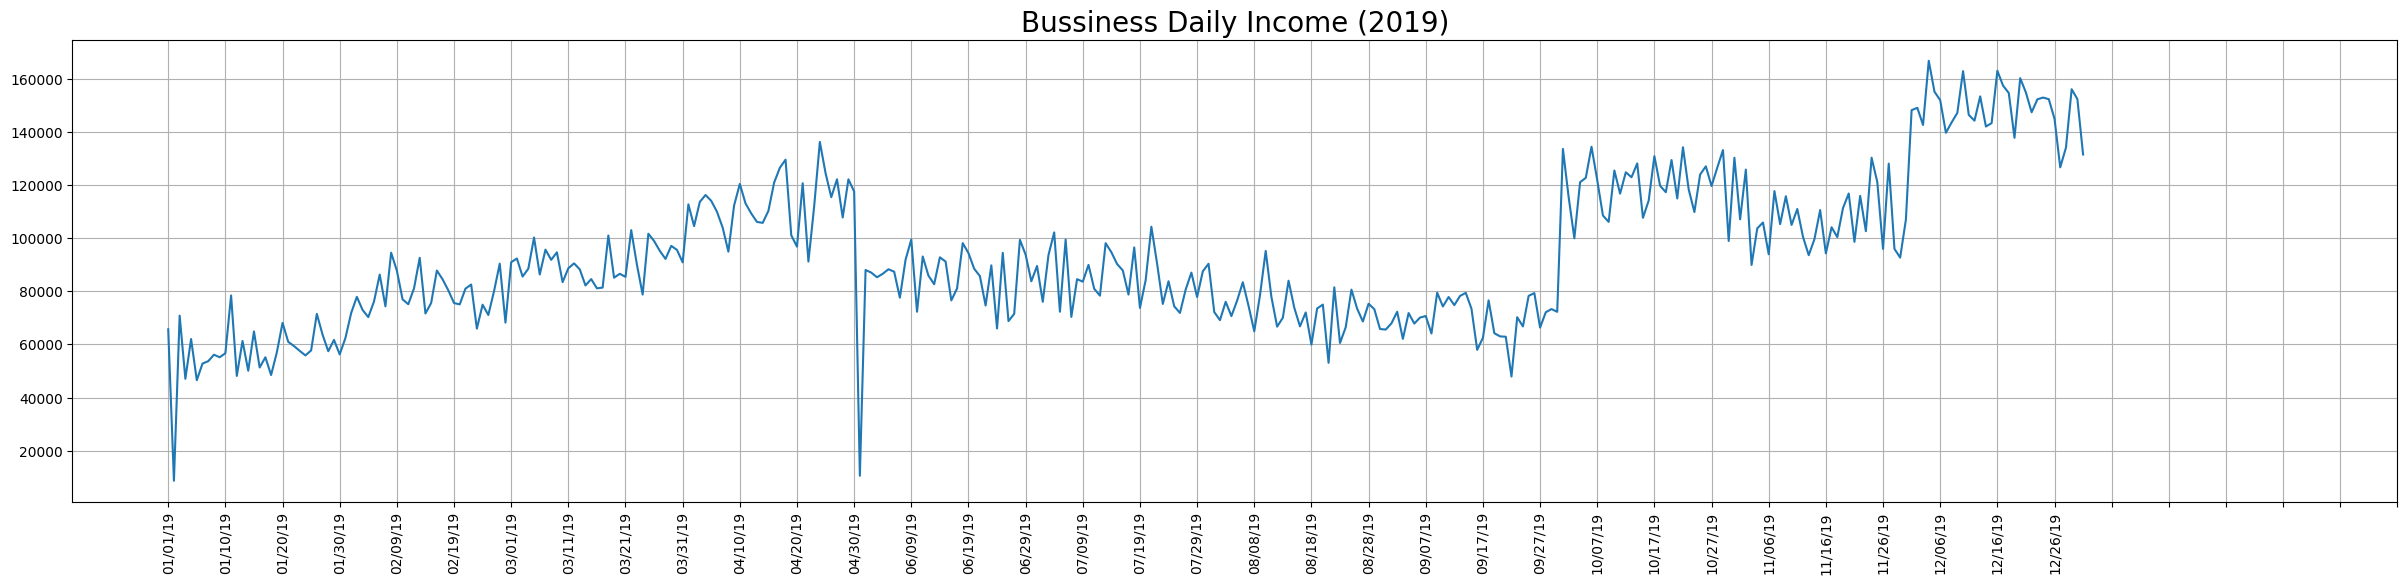

In [89]:
plt.figure(dpi=100, figsize=(30,6))
plt.plot(dailyIncome)
plt.title("Bussiness Daily Income (2019)", fontsize=20)
plt.xticks([n for n in range(0,400,10)], rotation=90)
plt.grid();

In [ ]:
dailyMeanIncome = salesDf.groupby(["Order Date Day"]).mean()["Income"]

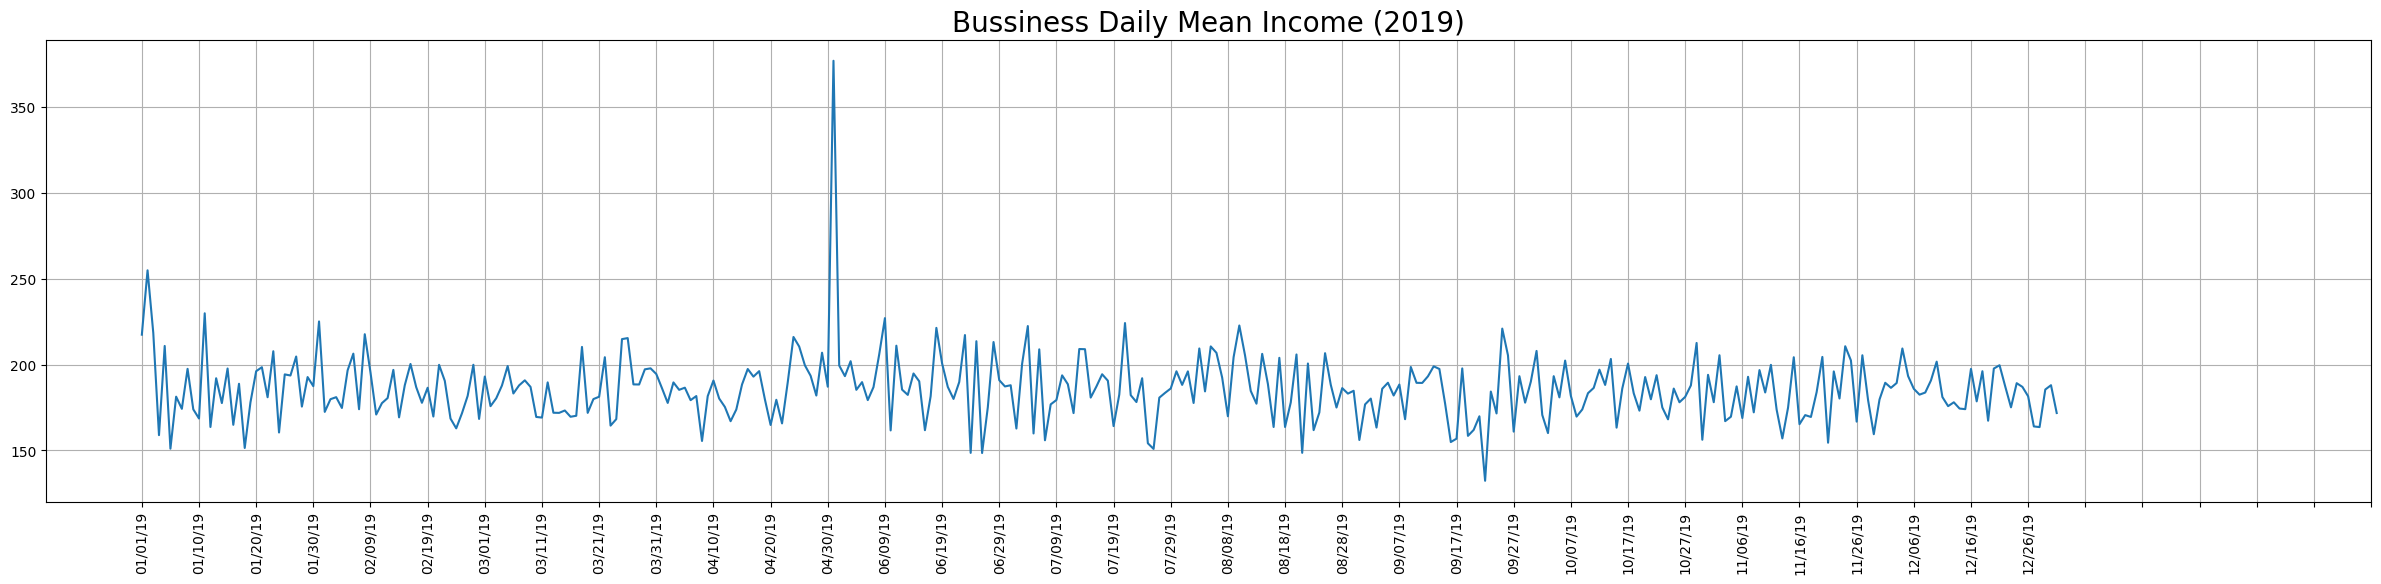

In [90]:
plt.figure(dpi=100, figsize=(30,6))
plt.plot(dailyMeanIncome)
plt.title("Bussiness Daily Mean Income (2019)", fontsize=20)
plt.grid()
plt.xticks([n for n in range(0,400,10)], rotation=90);

In [ ]:
meanHour = salesDf.groupby(["Order Date Day"]).mean()["Order Date Hour Num"].apply(numeric_to_hour);
medianHour = salesDf.groupby(["Order Date Day"]).median()["Order Date Hour Num"].apply(numeric_to_hour);

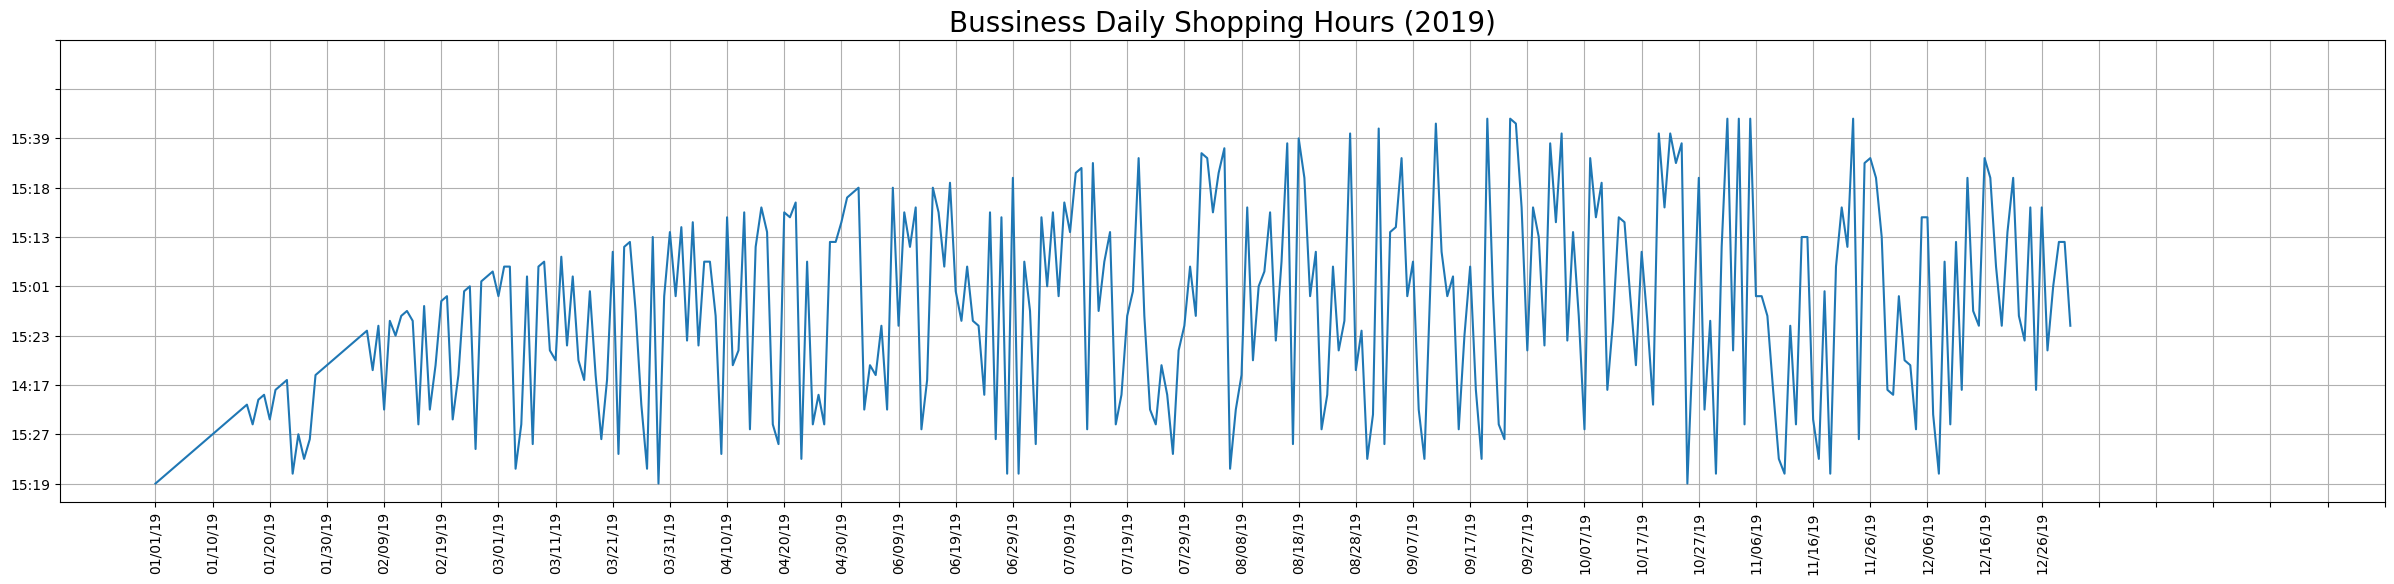

In [48]:
plt.figure(dpi=100, figsize=(30,6))
plt.plot(meanHour)
plt.title("Bussiness Daily Shopping Hours (2019)", fontsize=20)
plt.xticks([n for n in range(0,400,10)], rotation=90);
plt.yticks([n for n in range(0,100,10)])
plt.grid()

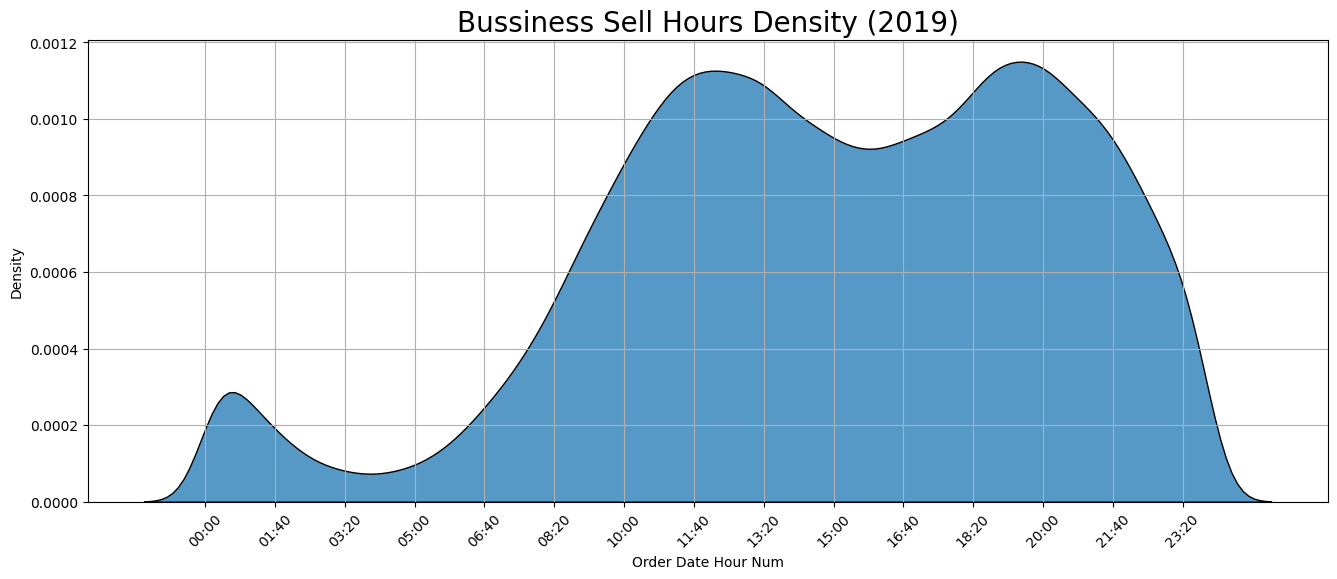

In [133]:
plt.figure(dpi=100, figsize=(16,6))
sns.kdeplot(pd.to_numeric(salesDf["Order Date Hour Num"]), multiple="stack")
plt.title("Bussiness Sell Hours Density (2019)", fontsize=20)
plt.grid()
plt.xticks([i for i in range(0,1439,100)], [numeric_to_hour(i) for i in range(0,1439,100)], rotation=45);